In [37]:
using PyPlot;

# Aufgabe 1
### Teil a

In [42]:
function int2spin(integer,N)
    vec = split(string(bin(integer,N)),"")
    vec = map(x->parse(Int,x), vec)
    return vec-.5
end
function H(spins, J, h)
    N = length(spins)
    sum1 = 0
    for i in 1:N-1
        sum1 += spins[i]*spins[i+1]
    end
    return -J*sum1-h*sum(spins)
end
function boltz(spins, T, J, h)
    k_B = 1
    return exp(-H(spins, J, h)/(k_B*T))
end
function M(T, N, J, h)
    
    Z = 0
    for i in 0:2^N-1
        Z += boltz(int2spin(i,N), T, J, h)
    end
    
    sum1 = 0
    for i in 0:2^N-1
        spins = int2spin(i,N)
        sum1 += boltz(spins, T, J, h)*sum(spins)/Z
    end
    return sum1
end
function markov(spins, L, T, J, h)
    N = length(spins)
    result = Array{Float64}(N, L)
    result[:,1] = spins
    for i in 2:L
        k = Int(round(rand()*(N-1)+1, 0))
        spins_now = result[:,i-1]
        spins_next = copy(spins_now)
        spins_next[k] *= -1
        alpha = boltz(spins_next, T, J, h)/boltz(spins_now, T, J, h)
        if alpha < rand()
            result[:,i] = spins_now
        else
            result[:,i] = spins_next
        end
    end
    return result
end;

In [33]:
N = 3; L = 5; T = 5; J = 1; h = 1
a = markov(int2spin(Int(round(rand()*(2^N-1), 0)), N), L, T, J, h)
println(a)
sum(a)

[0.5 0.5 0.5 0.5 0.5; 0.5 0.5 -0.5 0.5 -0.5; -0.5 0.5 0.5 0.5 0.5]


4.5

### Teil b + c

In [34]:
function M_markov(T, L, N, J, h)
    random_spins = int2spin(Int(round(rand()*(2^N-1), 0)), N)
    return sum(markov(random_spins, L, T, J, h))/L
end

M_markov (generic function with 1 method)

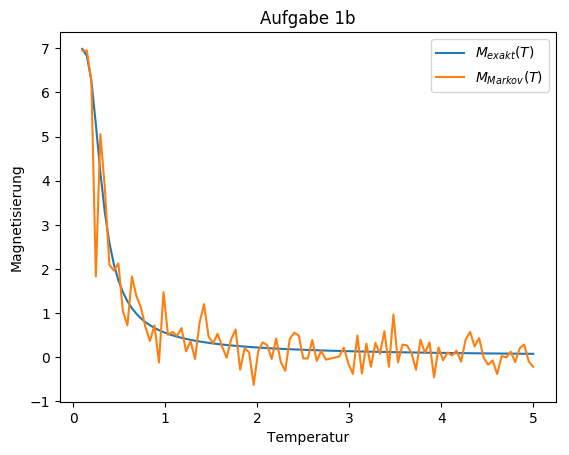

In [47]:
N = 14; L = 1000; J = 1; h = .1; steps = 101
T_list = linspace(.1,5,steps)
M_list = Array{Float64}(steps)
M_markov_list = Array{Float64}(steps)
figure(1)
for i in 1:steps
    M_list[i] = M(T_list[i], N, J, h)
    M_markov_list[i] = M_markov(T_list[i], L, N, J, h)
end
plot(T_list, M_list, label="\$M_{exakt}(T)\$")
plot(T_list, M_markov_list, label="\$M_{Markov}(T)\$")
legend()
xlabel("Temperatur")
ylabel("Magnetisierung")
title("Aufgabe 1b")
show()

In [ ]:
N = 14; J = 1; h = .1; T_steps = 101; L_steps = 4
T_list = linspace(.1,5,T_steps)
L_list = Int.(round.(linspace(1e3, 1e5, L_steps), 0))
figure(1)
for L in L_list
    M_markov_list = Array{Float64}(steps)
    for i in 1:T_steps
        M_markov_list[i] = M_markov(T_list[i], L, N, J, h)
    end
    plot(T_list, M_markov_list, label="\$M_{Markov, L=$L}(T)\$")
end
legend()
xlabel("Temperatur")
ylabel("Magnetisierung")
title("Aufgabe 1c")
show()